In [60]:
import numpy as np
import scipy.integrate as sc_int
import matplotlib.pyplot as plt
import matplotlib
import sympy as sp
from sympy import symbols
import seaborn

seaborn.set_palette('muted')

sp.init_printing()

%matplotlib inline

# Chapter 5, §1 #7

**Sketch the vector field for the following system. Indicate the length and direction of the vectors. Sketch some trajectories.**

$$
\dot{x} = x, \dot{y} = x + y
$$

Let's make a generic vector field plotter.

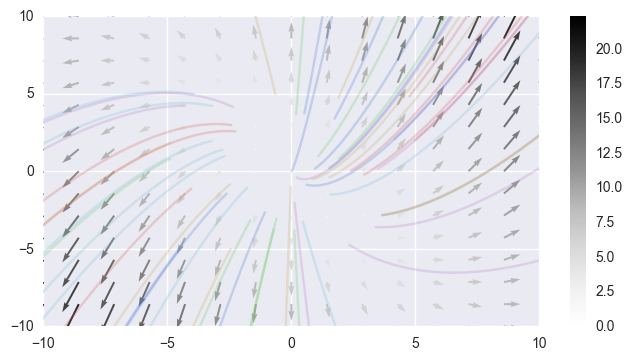

In [195]:
def vector_field(func, c0, c1, spots=50, tmax=10, lines=None):
    Y, X = np.mgrid[c0:c1:15j, c0:c1:15j]
    U, V = func((X, Y), 0)
    length = np.sqrt(U**2 + V**2)
    
    plt.figure(figsize=(8, 4))
    plt.quiver(X, Y, U, V, length)
    times = np.linspace(0, tmax, 1000)
    points = ((c1 - c0) * np.random.random(size=(spots, 2)) / 2 + (c0 / 2))
    points[0] = [0.01, 0.01]
    for y0 in points:
        y = sc_int.odeint(func, y0, times)
        plt.plot(y[:, 0], y[:, 1], alpha=0.25)
    if lines is not None:
        x = np.linspace(c0, c1, 100)
        for line in lines:
            plt.plot(x, line(x))
    plt.colorbar()
    plt.xlim(c0, c1)
    plt.ylim(c0, c1)
    plt.show()
    
def system(y, t):
    """y is vector"""
    return y[0], y[0] + y[1]
    
vector_field(system, -10, 10)

Nice

# Chapter 5, §1 #10

**For each of the following systems, decide whether the origin is attracting, Liapunov stable, asymptotically stable, or none of the above.**

## A

$$
\dot{x} = y, \dot{y} = -4x
$$

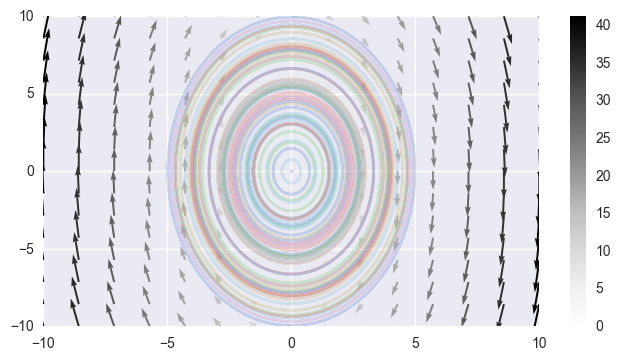

In [196]:
vector_field(lambda y, t: (y[1], -4 * y[0]), -10, 10)

Since the trajectories just orbit the origin, this is Liapunov stable.

## B

$$
\dot{x} = 2y, \dot{y} = x
$$

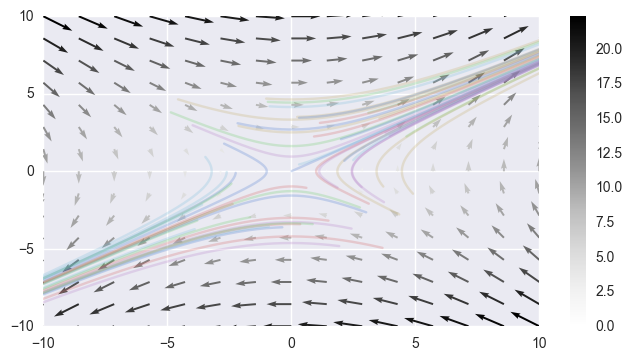

In [197]:
vector_field(lambda y, t: (2 * y[1], y[0]), -10, 10)

The trajectories are repelled, so neither.

## C

$$
\dot{x} = 0, \dot{y} = x
$$

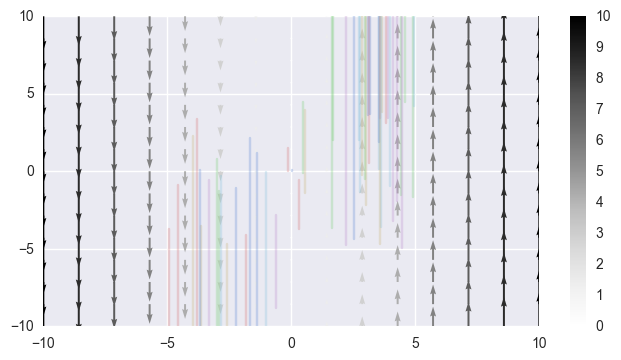

In [198]:
vector_field(lambda y, t: (0, y[0]), -10, 10)

The origin is actually Liapunov stable, as those orbits that start close enough, stay at that distance. However, it does not attract.

## D

$$
\dot{x} = 0, \dot{y} = -y
$$

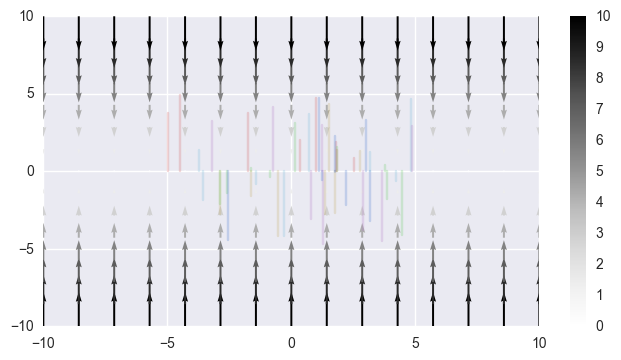

In [199]:
vector_field(lambda y, t: (0, -y[1]), -10, 10)

This is definitely asymptotically stable as trajectories are attracted and get closer.

## E

$$
\dot{x} = -x, \dot{y} = -5y
$$

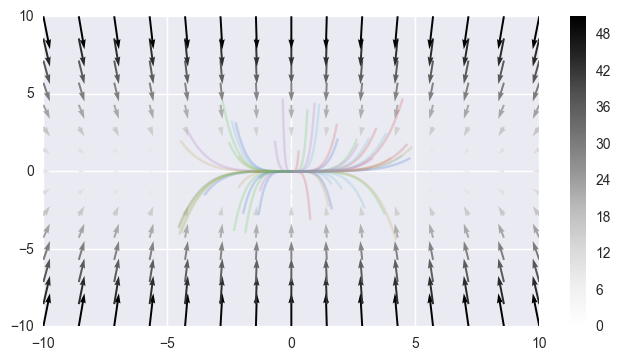

In [200]:
vector_field(lambda y, t: (-y[0], -5 * y[1]), -10, 10)

Again, asymptotically stable.

## F

$$
\dot{x} = x, \dot{y} = y
$$

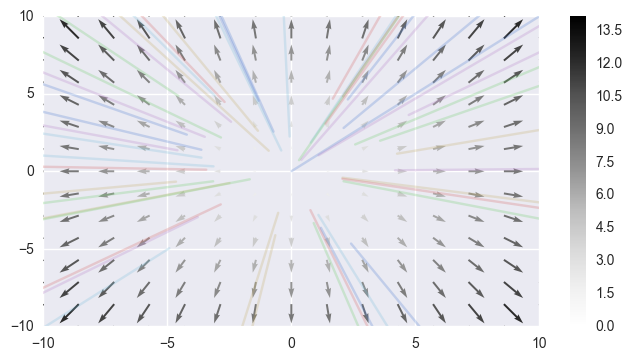

In [201]:
vector_field(lambda y, t: (y[0], y[1]), -10, 10)

Neither since it repels.

# Chapter 5, §2 #4

**Plot the phase portrait and classify the fixed point. If the eigenvectors are real, indicate it.**

$$
\dot{x} = 5x + 10y, \dot{y} = -x - y
$$

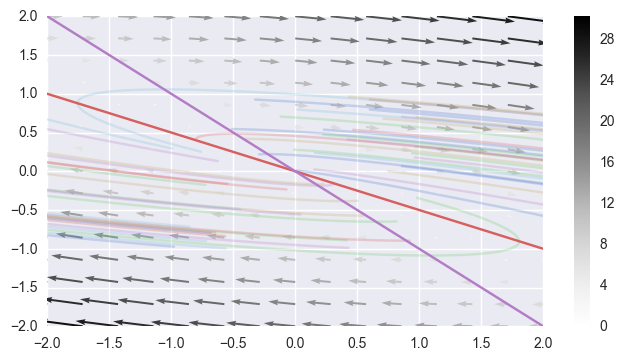

In [206]:
vector_field(lambda y, t: (5 * y[0] + 10 * y[1], -y[0] - y[1]),
             -2, 2,
            lines=[lambda x: (-1/2) * x, lambda x: -x])

With corresponding non-real eigenvalues and eigenvectors,

In [203]:
np.linalg.eig(np.array([[5, 10],
                        [-1, -1]]))

(array([ 2.+1.j,  2.-1.j]),
 array([[ 0.95346259+0.j        ,  0.95346259-0.j        ],
        [-0.28603878+0.09534626j, -0.28603878-0.09534626j]]))

This is a source spiral.

# Chapter 5, §2 #8

$$
\dot{x} = -3x + 4y, \dot{y} = -2x + 3y
$$

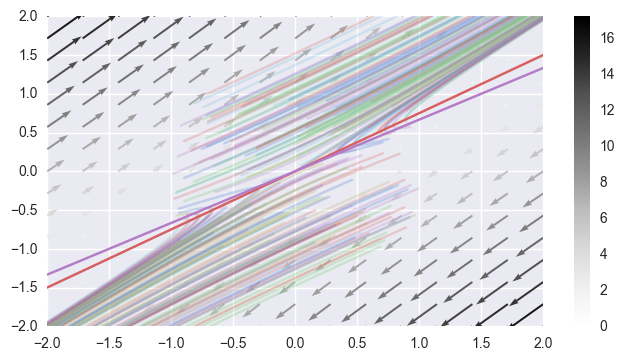

In [204]:
vector_field(lambda y, t: (-3 * y[0] + 4 * y[1],
                           -2 * y[0] + 3 * y[1]),
             -2, 2, spots=200,
             lines=[lambda x: (3 / 4) * x, lambda x: (2 / 3) * x])

With corresponding real eigenvalues and eigenvectors,

In [172]:
np.linalg.eig(np.array([[-3, 4],
                        [-2, 3]]))

(array([-1.,  1.]), array([[-0.89442719, -0.70710678],
        [-0.4472136 , -0.70710678]]))

This is a saddle point.

# Chapter 5, §2 #10

$$
\dot{x} = y, \dot{y} = -x - 2y
$$

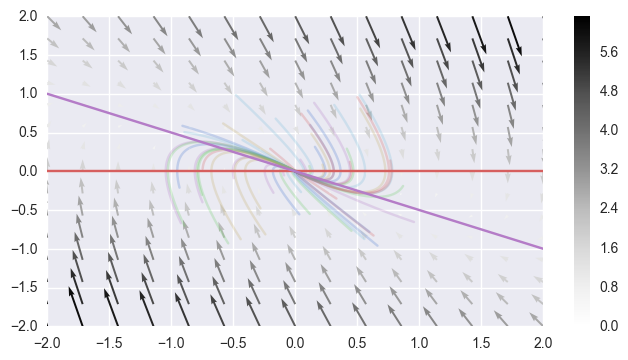

In [208]:
vector_field(lambda y, t: (y[1], -y[0] - 2*y[1]),
             -2, 2,
            lines=[lambda x: 0 * x, lambda x: -x / 2])

This is a spiral sink.

# Chapter 5, §2 #14

**Suppose we pick a linear system at random, what's the probability the origin will be unstable? To be more specific, consider the system $\dot{x} = Ax$ where $A$ is a $2 \times 2$ matrix. Suppose we choose $A$ randomly. Find the probabilities of all the different kinds of fixed points.**

**Simulate with Monte Carlo methods**

In [244]:
num = 100000

In [245]:
probs = {'unstable':0, 'stable':0, 'hyperbolic':0}
for i in range(num):
    A = np.random.uniform(-100, 100, size=(2, 2))
    vals, vecs = np.linalg.eig(A)
    if all(vals > 0):
        probs['unstable'] += 1
    elif all(vals < 0):
        probs['stable'] += 1
    elif (vals[0] < 0 and vals[1] > 0) or (vals[1] < 0 and vals[0] > 0):
        probs['hyperbolic'] += 1
{k:v / num for k, v in probs.items()}

{'hyperbolic': 0.50078, 'stable': 0.2485, 'unstable': 0.25072}

**Are the answers the same if you use Normal instead of Uniform?**

In [246]:
probs = {'unstable':0, 'stable':0, 'hyperbolic':0}
for i in range(num):
    A = np.random.normal(0, 1, size=(2, 2))
    vals, vecs = np.linalg.eig(A)
    if all(vals > 0):
        probs['unstable'] += 1
    elif all(vals < 0):
        probs['stable'] += 1
    elif (vals[0] < 0 and vals[1] > 0) or (vals[1] < 0 and vals[0] > 0):
        probs['hyperbolic'] += 1
{k:v / num for k, v in probs.items()}

{'hyperbolic': 0.49955, 'stable': 0.24981, 'unstable': 0.25064}

# Chapter 6, §1 #4

**Find the fixed points. Then sketch the null-clines, the vector field, and a plausible phase portrait.**

$$
\dot{x} = y, \dot{y} = x (1 + y) - 1
$$

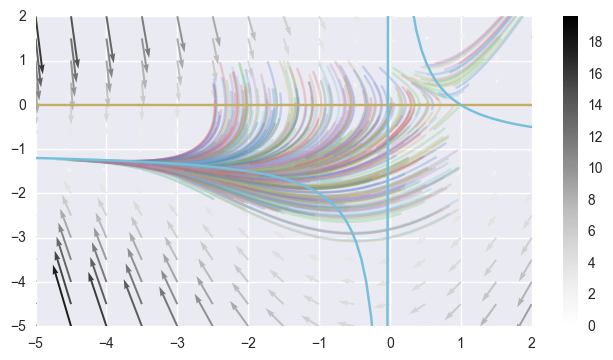

In [214]:
vector_field(lambda y, t: (y[1], y[0] * (1 + y[1]) - 1),
             -5, 2, tmax=1.5, spots=400,
            lines=[lambda x: 0 * x, lambda x: (1 / x) - 1])

There is one fixed point at $(1, 1)$, which is a source.

# Chapter 6, §1 #10

**Plot the phase portrait of the following system.**

$$
\dot{x} = y + y^2, \dot{y} = -\frac{1}{2} x + \frac{1}{5} y - xy + \frac{6}{5} y^2
$$

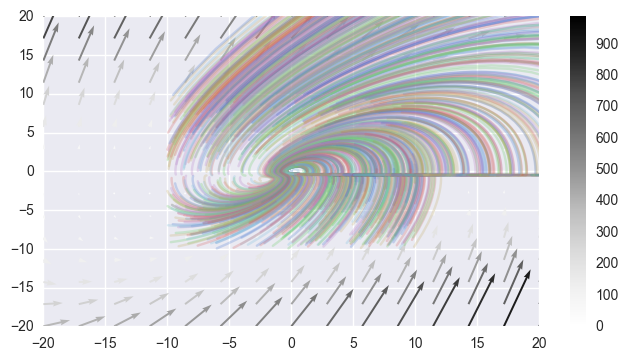

In [215]:
vector_field(lambda y, t: (y[1] + y[1]**2, (-1/2) * y[0] + (1 / 5) * y[1] - y[0] * y[1] + (6 / 5) * y[1]**2),
             -20, 20, spots=1000)

# Chapter 6, §3 #2

**Find the fixed points, classify them, sketch the trajectories, and fill the rest of the phase portrait.**

$$
\dot{x} = \sin y, \dot{y} = x - x^3
$$

/home/zoe/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


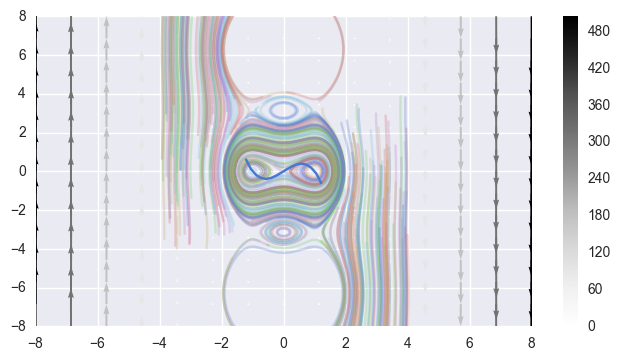

In [222]:
vector_field(lambda y, t: (np.sin(y[1]), y[0] - y[0]**3),
             -8, 8, spots=300, lines=[lambda x: np.arcsin(x * (1 - x**2))])

# Chapter 6, §3 #6

$$
\dot{x} = xy - 1, \dot{y} = x - y^3
$$

/home/zoe/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()
/home/zoe/.local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in power


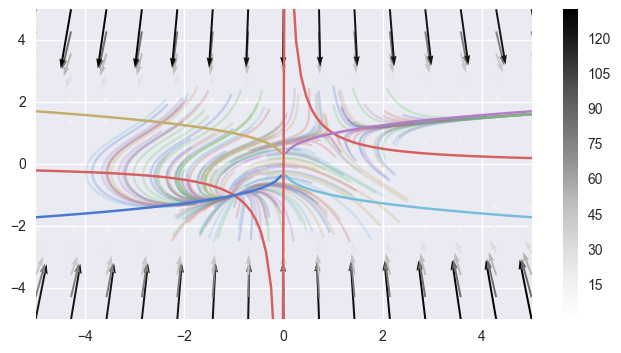

In [253]:
vector_field(lambda y, t: (y[0] * y[1] - 1, y[0] - y[1]**3),
             -5, 5, spots=200, tmax=1.5,
            lines=[lambda x: 1 / x, lambda x: x**(1/3), lambda x: (-x)**(1/3),
                  lambda x: -x**(1/3), lambda x: -(-x)**(1/3)])

There are two fixed points, one at $(1, 1)$ and one at $(-1, -1)$, both of which are sinks.